In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy import stats

from compton import setup_rc_params

setup_rc_params()

In GMP 2016 they use
\begin{align}
    \xi^{(s)} & = c_0^{(s)} + c_2^{(s)} \delta^2 + \Delta_2^{(s)} \\
    \xi^{(v)} & = c_0^{(v)} + \Delta_0^{(v)}
\end{align}
and find a posterior for $\Delta$ given the convergence pattern as in Furnstahl (2015).
So the first omitted term for the scalar pieces goes as $\delta^3$ and the first omitted term for the vector piece goes as $\delta^1$.

In [2]:
# e^2 delta^2, e^2 delta^3, e^2 delta^4-fitted
gamma_e1e1_proton = np.array([-5.68562, -5.45127, -1.1])
gamma_e1e1_neutron = np.array([-5.68562, -5.45127, -4.0227])

# gamma_m1m1_proton = np.array([-1.13712, 1.95882, 2.2])
# gamma_m1m1_neutron = np.array([-1.13712, 1.95882, 1.26474])

# Use a fitted value for NLO...?
gamma_m1m1_proton = np.array([-1.13712, 1.63, 2.2])
gamma_m1m1_neutron = np.array([-1.13712, 1.63, 1.26474])

gamma_e1m2_proton = np.array([1.13712, 0.55244, -0.4])
gamma_e1m2_neutron = np.array([1.13712, 0.55244, -0.1343])

gamma_m1e2_proton = np.array([1.13712, 1.2701, 1.9])
gamma_m1e2_neutron = np.array([1.13712, 1.2701, 2.36763])

gamma_0_proton = - (gamma_e1e1_proton + gamma_m1m1_proton + gamma_e1m2_proton + gamma_m1e2_proton)
gamma_pi_proton = - gamma_e1e1_proton + gamma_m1m1_proton - gamma_e1m2_proton + gamma_m1e2_proton

gamma_0_neutron = - (gamma_e1e1_neutron + gamma_m1m1_neutron + gamma_e1m2_neutron + gamma_m1e2_neutron)
gamma_pi_neutron = - gamma_e1e1_neutron + gamma_m1m1_neutron - gamma_e1m2_neutron + gamma_m1e2_neutron

In [3]:
gamma_0_proton

array([ 4.5485 ,  1.99873, -2.6    ])

In [4]:
gamma_pi_proton

array([4.5485 , 7.79893, 5.6    ])

In [5]:
gamma_0_neutron

array([4.5485 , 1.99873, 0.52463])

In [6]:
gamma_pi_neutron

array([4.5485 , 7.79893, 7.78937])

In [7]:
# Table 2
# gamma_e1e1_scalar = [-5.7, -2.6]
# gamma_e1e1_vector = [+1.5]

# gamma_m1m1_scalar = [-1.1, +1.8]
# gamma_m1m1_vector = [+0.5]

# gamma_e1m2_scalar = [+1.1, -0.3]
# gamma_e1m2_vector = [-0.1]

# gamma_m1e2_scalar = [+1.1, +2.2]
# gamma_m1e2_vector = [-0.2]

scalar_idxs = [0, -1]
scalar_idxs_m1m1 = [0, 1, 2]
vector_idxs = [-1]

gamma_e1e1_scalar = (gamma_e1e1_proton + gamma_e1e1_neutron)[scalar_idxs] / 2
gamma_e1e1_vector = (gamma_e1e1_proton - gamma_e1e1_neutron)[vector_idxs] / 2

gamma_m1m1_scalar = (gamma_m1m1_proton + gamma_m1m1_neutron)[scalar_idxs_m1m1] / 2
gamma_m1m1_vector = (gamma_m1m1_proton - gamma_m1m1_neutron)[vector_idxs] / 2

gamma_e1m2_scalar = (gamma_e1m2_proton + gamma_e1m2_neutron)[scalar_idxs] / 2
gamma_e1m2_vector = (gamma_e1m2_proton - gamma_e1m2_neutron)[vector_idxs] / 2

gamma_m1e2_scalar = (gamma_m1e2_proton + gamma_m1e2_neutron)[scalar_idxs] / 2
gamma_m1e2_vector = (gamma_m1e2_proton - gamma_m1e2_neutron)[vector_idxs] / 2

gamma_0_scalar = (gamma_0_proton + gamma_0_neutron)[scalar_idxs_m1m1] / 2
gamma_0_vector = (gamma_0_proton - gamma_0_neutron)[vector_idxs] / 2

gamma_pi_scalar = (gamma_pi_proton + gamma_pi_neutron)[scalar_idxs_m1m1] / 2
gamma_pi_vector = (gamma_pi_proton - gamma_pi_neutron)[vector_idxs] / 2

In [8]:
print('gamma E1E1 Scalar:', gamma_e1e1_scalar)
print('gamma E1E1 Vector:', gamma_e1e1_vector)

print('gamma M1M1 Scalar:', gamma_m1m1_scalar)
print('gamma M1M1 Vector:', gamma_m1m1_vector)

print('gamma E1M2 Scalar:', gamma_e1m2_scalar)
print('gamma E1M2 Vector:', gamma_e1m2_vector)

print('gamma M1E2 Scalar:', gamma_m1e2_scalar)
print('gamma M1E2 Vector:', gamma_m1e2_vector)

print('gamma 0 Scalar:', gamma_0_scalar)
print('gamma 0 Vector:', gamma_0_vector)

print('gamma pi Scalar:', gamma_pi_scalar)
print('gamma pi Vector:', gamma_pi_vector)

gamma E1E1 Scalar: [-5.68562 -2.56135]
gamma E1E1 Vector: [1.46135]
gamma M1M1 Scalar: [-1.13712  1.63     1.73237]
gamma M1M1 Vector: [0.46763]
gamma E1M2 Scalar: [ 1.13712 -0.26715]
gamma E1M2 Vector: [-0.13285]
gamma M1E2 Scalar: [1.13712  2.133815]
gamma M1E2 Vector: [-0.233815]
gamma 0 Scalar: [ 4.5485    1.99873  -1.037685]
gamma 0 Vector: [-1.562315]
gamma pi Scalar: [4.5485   7.79893  6.694685]
gamma pi Vector: [-1.094685]


In [9]:
def compute_coefficients(y, Q, orders=None):
    if orders is None:
        orders = np.arange(len(y))
    y = np.atleast_1d(y)
    diffs = np.diff(y)
    diffs = np.insert(diffs, 0, y[0])
    return diffs / Q ** orders

In [10]:
delta = 0.4  # Eq. (2)

Extract coefficients

In [11]:
orders_isoscl = np.array([0, 2])
orders_isoscl_m1m1 = np.array([0, 1, 2])
orders_isovec = np.array([0])

coefs_e1e1_scalar = compute_coefficients(gamma_e1e1_scalar, delta, orders=orders_isoscl)
coefs_e1e1_vector = compute_coefficients(gamma_e1e1_vector, delta, orders=orders_isovec)

coefs_m1m1_scalar = compute_coefficients(gamma_m1m1_scalar, delta, orders=orders_isoscl_m1m1)
coefs_m1m1_vector = compute_coefficients(gamma_m1m1_vector, delta, orders=orders_isovec)

coefs_e1m2_scalar = compute_coefficients(gamma_e1m2_scalar, delta, orders=orders_isoscl)
coefs_e1m2_vector = compute_coefficients(gamma_e1m2_vector, delta, orders=orders_isovec)

coefs_m1e2_scalar = compute_coefficients(gamma_m1e2_scalar, delta, orders=orders_isoscl)
coefs_m1e2_vector = compute_coefficients(gamma_m1e2_vector, delta, orders=orders_isovec)

coefs_0_scalar = compute_coefficients(gamma_0_scalar, delta, orders=orders_isoscl_m1m1)
coefs_0_vector = compute_coefficients(gamma_0_vector, delta, orders=orders_isovec)

coefs_pi_scalar = compute_coefficients(gamma_pi_scalar, delta, orders=orders_isoscl_m1m1)
coefs_pi_vector = compute_coefficients(gamma_pi_vector, delta, orders=orders_isovec)

In [12]:
print('Scalar E1E1 c_n:', coefs_e1e1_scalar)
print('Vector E1E1 c_n:', coefs_e1e1_vector)

Scalar E1E1 c_n: [-5.68562   19.5266875]
Vector E1E1 c_n: [1.46135]


In [13]:
print('Scalar M1M1 c_n:', coefs_m1m1_scalar)
print('Vector M1M1 c_n:', coefs_m1m1_vector)

Scalar M1M1 c_n: [-1.13712    6.9178     0.6398125]
Vector M1M1 c_n: [0.46763]


In [14]:
print('Scalar E1M2 c_n:', coefs_e1m2_scalar)
print('Vector E1M2 c_n:', coefs_e1m2_vector)

Scalar E1M2 c_n: [ 1.13712   -8.7766875]
Vector E1M2 c_n: [-0.13285]


In [15]:
print('Scalar M1E2 c_n:', coefs_m1e2_scalar)
print('Vector M1E2 c_n:', coefs_m1e2_vector)

Scalar M1E2 c_n: [1.13712    6.22934375]
Vector M1E2 c_n: [-0.233815]


In [16]:
print('Scalar 0 c_n:', coefs_0_scalar)
print('Vector 0 c_n:', coefs_0_vector)

Scalar 0 c_n: [  4.5485      -6.374425   -18.97759375]
Vector 0 c_n: [-1.562315]


In [17]:
print('Scalar pi c_n:', coefs_pi_scalar)
print('Vector pi c_n:', coefs_pi_vector)

Scalar pi c_n: [ 4.5485      8.126075   -6.90153125]
Vector pi c_n: [-1.094685]


## 2016 Analysis (Set A Epsilon Priors)

In [18]:
def compute_A_eps1_posterior(x, c, Q, first_omitted_order=None, verbose=False):
    if first_omitted_order is None:
        first_omitted_order = len(c)
    n_c = len(c)
#     n_c = first_omitted_order
    max_c = np.max(np.abs(c))
    R = max_c * Q**first_omitted_order
    if verbose:
        print('R', R)
    factor = n_c / (n_c + 1.) / (2. * R)
    with np.errstate(divide='ignore'):
        return factor * np.where(np.abs(x) <= R, 1., (R / np.abs(x)) ** (n_c + 1))

In [19]:
def plot_scalar_and_vector(x, c_s, c_v, Q, first_omitted_order_s, first_omitted_order_v, num_x_minor=5, num_y_minor=5, ax=None):
    """A convenience function to make the same plot easily"""
    from matplotlib.ticker import MultipleLocator, AutoMinorLocator
    
    if ax is None:
        fig, ax = plt.subplots()
    ax.plot(x, compute_A_eps1_posterior(x, c_s, Q, first_omitted_order=first_omitted_order_s, verbose=True), c='b', ls='--')
    ax.plot(x, compute_A_eps1_posterior(x, c_v, Q, first_omitted_order=first_omitted_order_v, verbose=True), c='g', ls=':')
    
    # Grid that work well enough for these densities
    dense_x = np.linspace(-50, 50, 5000)
    post_s = compute_A_eps1_posterior(dense_x, c_s, Q, first_omitted_order=first_omitted_order_s)
    post_v = compute_A_eps1_posterior(dense_x, c_v, Q, first_omitted_order=first_omitted_order_v)
    conv = np.convolve(post_s, post_v, mode='same')
    conv /= np.trapz(conv, dense_x)
    conv_interp = np.interp(x, dense_x, conv)
    ax.plot(x, conv_interp, c='r')
    ax.margins(x=0)
    ax.xaxis.set_minor_locator(AutoMinorLocator(num_x_minor))
    ax.yaxis.set_minor_locator(AutoMinorLocator(num_y_minor))
    ax.tick_params(which='both', top=True, right=True)
    ax.set_ylim(0, None)
    return ax

In [20]:
N = 500
d_e1e1 = np.linspace(0, 10, N)
d_m1m1 = np.linspace(0, 3, N)
d_e1m2 = np.linspace(0, 3, N)
d_m1e2 = np.linspace(0, 3, N)
d_0 = np.linspace(0, 8, N)
d_pi = np.linspace(0, 8, N)

first_omitted_s = 3
first_omitted_v = 1

E1E1
R 1.2497080000000003
R 0.5845400000000001
M1M1
R 0.44273920000000005
R 0.18705200000000005
E1M2
R 0.561708
R 0.053140000000000014
M1E2
R 0.39867800000000014
R 0.09352600000000005
0
R 1.214566
R 0.6249260000000002
pi
R 0.5200688
R 0.4378740000000001


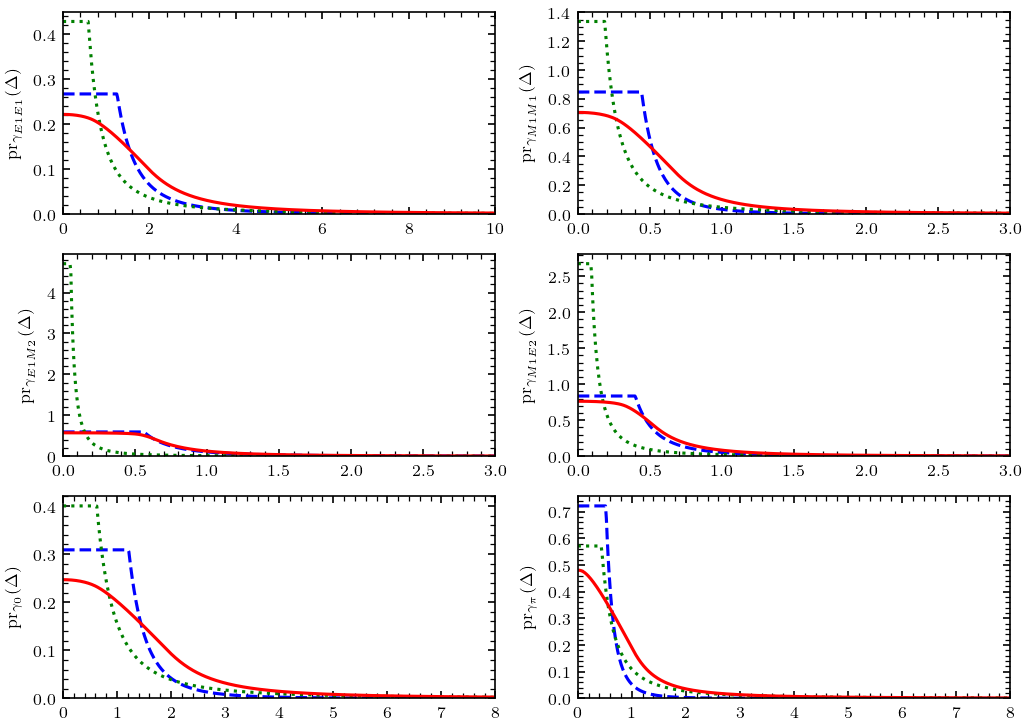

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(7, 5))

print('E1E1')
ax_e1e1 = plot_scalar_and_vector(
    d_e1e1, coefs_e1e1_scalar, coefs_e1e1_vector, delta, 
    first_omitted_order_s=first_omitted_s, first_omitted_order_v=first_omitted_v,
    ax=axes[0, 0]
)
ax_e1e1.yaxis.set_major_locator(MultipleLocator(0.1))
ax_e1e1.set_ylabel(r'pr$_{\gamma_{E1E1}}(\Delta)$')


print('M1M1')
ax_m1m1 = plot_scalar_and_vector(
    d_m1m1, coefs_m1m1_scalar, coefs_m1m1_vector, delta,
    first_omitted_order_s=first_omitted_s, first_omitted_order_v=first_omitted_v,
    num_y_minor=4, ax=axes[0, 1]
)
ax_m1m1.yaxis.set_major_locator(MultipleLocator(0.2))
ax_m1m1.set_ylabel(r'pr$_{\gamma_{M1M1}}(\Delta)$')

print('E1M2')
ax_e1m2 = plot_scalar_and_vector(
    d_e1m2, coefs_e1m2_scalar, coefs_e1m2_vector, delta,
    first_omitted_order_s=first_omitted_s, first_omitted_order_v=first_omitted_v,
    ax=axes[1, 0]
)
ax_e1m2.set_ylabel(r'pr$_{\gamma_{E1M2}}(\Delta)$')

print('M1E2')
ax_m1e2 = plot_scalar_and_vector(
    d_m1e2, coefs_m1e2_scalar, coefs_m1e2_vector, delta,
    first_omitted_order_s=first_omitted_s, first_omitted_order_v=first_omitted_v,
    ax=axes[1, 1]
)
ax_m1e2.set_ylabel(r'pr$_{\gamma_{M1E2}}(\Delta)$')

print('0')
ax_0 = plot_scalar_and_vector(
    d_0, coefs_0_scalar, coefs_0_vector, delta,
    first_omitted_order_s=first_omitted_s, first_omitted_order_v=first_omitted_v,
    ax=axes[2, 0]
)
ax_0.yaxis.set_major_locator(MultipleLocator(0.1))
ax_0.set_ylabel(r'pr$_{\gamma_0}(\Delta)$')

print('pi')
ax_pi = plot_scalar_and_vector(
    d_pi, coefs_pi_scalar, coefs_pi_vector, delta,
    first_omitted_order_s=first_omitted_s, first_omitted_order_v=first_omitted_v,
    ax=axes[2, 1]
)
ax_pi.yaxis.set_major_locator(MultipleLocator(0.1))
ax_pi.set_ylabel(r'pr$_{\gamma_{\pi}}(\Delta)$')

fig.tight_layout()
fig.savefig('pol_priors_set_Aeps')

Not bad! The $\gamma_0$ and $\gamma_\pi$ are still not exactly right. I'm not sure if I got the NLO corrections right.

## Updated Analysis

Here $\nu_0 = 0$ means that the prior is completely uninformative. To mirror the previous results, use that.

In [22]:
def compute_nu_and_tau(c, nu0=0, tau0=1):
    c = np.atleast_1d(c)
    nu = nu0 + len(c)
    tau_sq = (nu0 * tau0**2 + c @ c) / nu
    return nu, np.sqrt(tau_sq)

def compute_cbar_estimate(c, nu0=0, tau0=1):
    nu, tau = compute_nu_and_tau(c, nu0=nu0, tau0=tau0)
    # Either get the MAP value or the mean value...
#     return tau * np.sqrt(nu / (nu - 2))
    return tau * np.sqrt(nu / (nu + 2))

In [23]:
nu_0 = 0
tau_0 = 1

In [24]:
def plot_scalar_and_vector_gaussian(x, c_s, c_v, Q, first_omitted_order_s, first_omitted_order_v, num_x_minor=5, num_y_minor=5, nu0=0, tau0=1, ax=None, full_sum=True):
    """A convenience function to make the same plot easily"""
    from matplotlib.ticker import MultipleLocator, AutoMinorLocator
    
#     nu_s, tau_s = compute_nu_and_tau(c_s, nu0=nu0, tau0=tau0)
#     nu_v, tau_v = compute_nu_and_tau(c_v, nu0=nu0, tau0=tau0)
    cbar_s = compute_cbar_estimate(c_s, nu0=nu0, tau0=tau0)
    cbar_v = compute_cbar_estimate(c_v, nu0=nu0, tau0=tau0)
#     print('cbar_s:', cbar_s)
#     print('cbar_v:', cbar_v)
    
    if full_sum:
        Q_sum_s = Q**first_omitted_order_s / np.sqrt(1 - Q**2)
        Q_sum_v = Q**first_omitted_order_v / np.sqrt(1 - Q**2)
    else:
        Q_sum_s = Q**first_omitted_order_s
        Q_sum_v = Q**first_omitted_order_v
    
    std_s = cbar_s * Q_sum_s
    std_v = cbar_v * Q_sum_v
    
    if ax is None:
        fig, ax = plt.subplots()
        
    norm_s = stats.norm(scale=std_s)
    norm_v = stats.norm(scale=std_v)
    ax.plot(x, norm_s.pdf(x), c='b', ls='--')
    ax.plot(x, norm_v.pdf(x), c='g', ls=':')
    
    norm_tot = stats.norm(scale=np.sqrt(std_s**2 + std_v**2))
    ax.plot(x, norm_tot.pdf(x), c='r')
    ax.margins(x=0)
    ax.xaxis.set_minor_locator(AutoMinorLocator(num_x_minor))
    ax.yaxis.set_minor_locator(AutoMinorLocator(num_y_minor))
    ax.tick_params(which='both', top=True, right=True)
    ax.set_ylim(0, None)
    return ax


def plot_scalar_and_vector_student(x, c_s, c_v, Q, first_omitted_order_s, first_omitted_order_v, num_x_minor=5, num_y_minor=5, nu0=0, tau0=1, ax=None, full_sum=True):
    """A convenience function to make the same plot easily"""
    from matplotlib.ticker import MultipleLocator, AutoMinorLocator
    
    nu_s, tau_s = compute_nu_and_tau(c_s, nu0=nu0, tau0=tau0)
    nu_v, tau_v = compute_nu_and_tau(c_v, nu0=nu0, tau0=tau0)
    
    if full_sum:
        Q_sum_s = Q**first_omitted_order_s / np.sqrt(1 - Q**2)
        Q_sum_v = Q**first_omitted_order_v / np.sqrt(1 - Q**2)
    else:
        Q_sum_s = Q**first_omitted_order_s
        Q_sum_v = Q**first_omitted_order_v
    
    scale_s = tau_s * Q_sum_s
    scale_v = tau_v * Q_sum_v
    
    if ax is None:
        fig, ax = plt.subplots()
        
    t_s = stats.t(df=nu_s, scale=scale_s)
    t_v = stats.t(df=nu_v, scale=scale_v)
    
    ax.plot(x, t_s.pdf(x), c='b', ls='--')
    ax.plot(x, t_v.pdf(x), c='g', ls=':')
    
    # Grid that work well enough for these densities
    dense_x = np.linspace(-50, 50, 5000)
    post_s = t_s.pdf(dense_x)
    post_v = t_v.pdf(dense_x)
    conv = np.convolve(post_s, post_v, mode='same')
    conv /= np.trapz(conv, dense_x)
    conv_interp = np.interp(x, dense_x, conv)
    ax.plot(x, conv_interp, c='r')
    ax.margins(x=0)
    ax.xaxis.set_minor_locator(AutoMinorLocator(num_x_minor))
    ax.yaxis.set_minor_locator(AutoMinorLocator(num_y_minor))
    ax.tick_params(which='both', top=True, right=True)
    ax.set_ylim(0, None)
    return ax

The Gaussian plots below show the problem with using MAP values when you actually have quite long tails! Point estimates are not always representative of the full distribution.

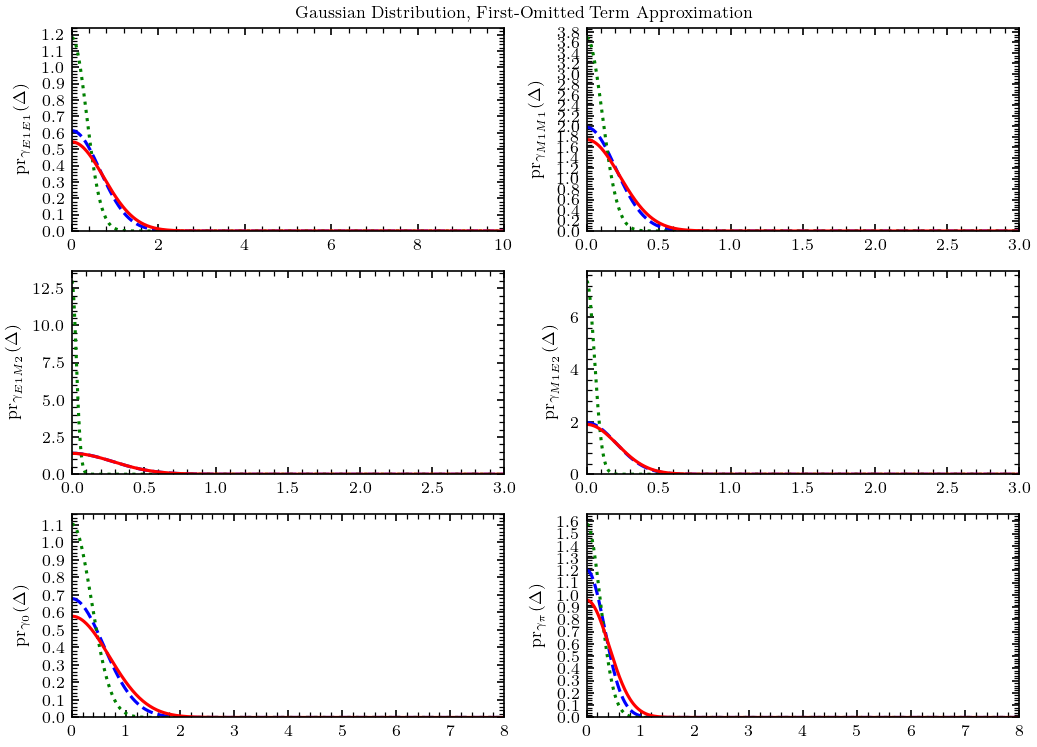

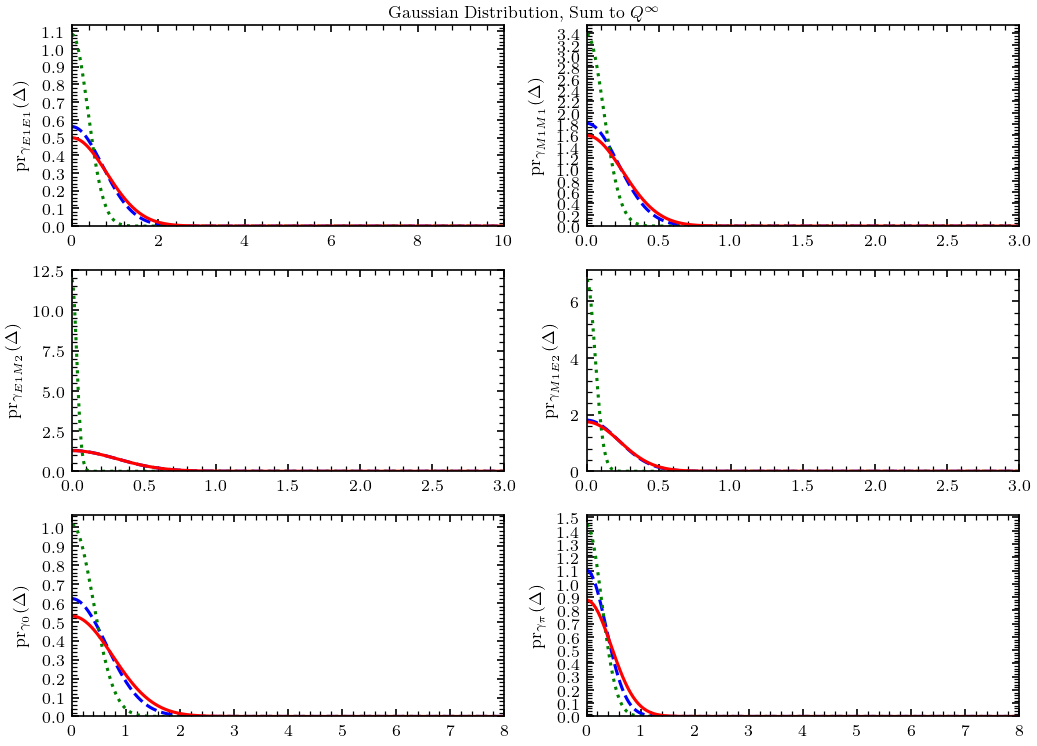

In [25]:
for sum_to_inf in [False, True]:
    fig, axes = plt.subplots(3, 2, figsize=(7, 5))
    ax_e1e1 = plot_scalar_and_vector_gaussian(
        d_e1e1, coefs_e1e1_scalar, coefs_e1e1_vector, delta, 
        first_omitted_order_s=first_omitted_s, first_omitted_order_v=first_omitted_v,
        nu0=nu_0, tau0=tau_0, ax=axes[0, 0], full_sum=sum_to_inf
    )
    ax_e1e1.yaxis.set_major_locator(MultipleLocator(0.1))
    ax_e1e1.set_ylabel(r'pr$_{\gamma_{E1E1}}(\Delta)$')


    ax_m1m1 = plot_scalar_and_vector_gaussian(
        d_m1m1, coefs_m1m1_scalar, coefs_m1m1_vector, delta,
        first_omitted_order_s=first_omitted_s, first_omitted_order_v=first_omitted_v,
        num_y_minor=4, nu0=nu_0, tau0=tau_0, ax=axes[0, 1], full_sum=sum_to_inf
    )
    ax_m1m1.yaxis.set_major_locator(MultipleLocator(0.2))
    ax_m1m1.set_ylabel(r'pr$_{\gamma_{M1M1}}(\Delta)$')

    ax_e1m2 = plot_scalar_and_vector_gaussian(
        d_e1m2, coefs_e1m2_scalar, coefs_e1m2_vector, delta,
        first_omitted_order_s=first_omitted_s, first_omitted_order_v=first_omitted_v,
        nu0=nu_0, tau0=tau_0, ax=axes[1, 0], full_sum=sum_to_inf
    )
    ax_e1m2.set_ylabel(r'pr$_{\gamma_{E1M2}}(\Delta)$')

    ax_m1e2 = plot_scalar_and_vector_gaussian(
        d_m1e2, coefs_m1e2_scalar, coefs_m1e2_vector, delta,
        first_omitted_order_s=first_omitted_s, first_omitted_order_v=first_omitted_v,
        nu0=nu_0, tau0=tau_0, ax=axes[1, 1], full_sum=sum_to_inf
    )
    ax_m1e2.set_ylabel(r'pr$_{\gamma_{M1E2}}(\Delta)$')
    
    ax_0 = plot_scalar_and_vector_gaussian(
        d_0, coefs_0_scalar, coefs_0_vector, delta,
        first_omitted_order_s=first_omitted_s, first_omitted_order_v=first_omitted_v,
        nu0=nu_0, tau0=tau_0, ax=axes[2, 0], full_sum=sum_to_inf
    )
    ax_0.yaxis.set_major_locator(MultipleLocator(0.1))
    ax_0.set_ylabel(r'pr$_{\gamma_0}(\Delta)$')

    ax_pi = plot_scalar_and_vector_gaussian(
        d_pi, coefs_pi_scalar, coefs_pi_vector, delta,
        first_omitted_order_s=first_omitted_s, first_omitted_order_v=first_omitted_v,
        nu0=nu_0, tau0=tau_0, ax=axes[2, 1], full_sum=sum_to_inf
    )
    ax_pi.yaxis.set_major_locator(MultipleLocator(0.1))
    ax_pi.set_ylabel(r'pr$_{\gamma_{\pi}}(\Delta)$')
    
    if sum_to_inf:
        fig.suptitle('Gaussian Distribution, Sum to $Q^\infty$', y=1)
    else:
        fig.suptitle('Gaussian Distribution, First-Omitted Term Approximation', y=1)

    fig.tight_layout()
    plt.show()
    fig.savefig(f'pol_priors_conjugate_gaussian_sum-inf-{sum_to_inf}')

The integrated distributions below look much better.

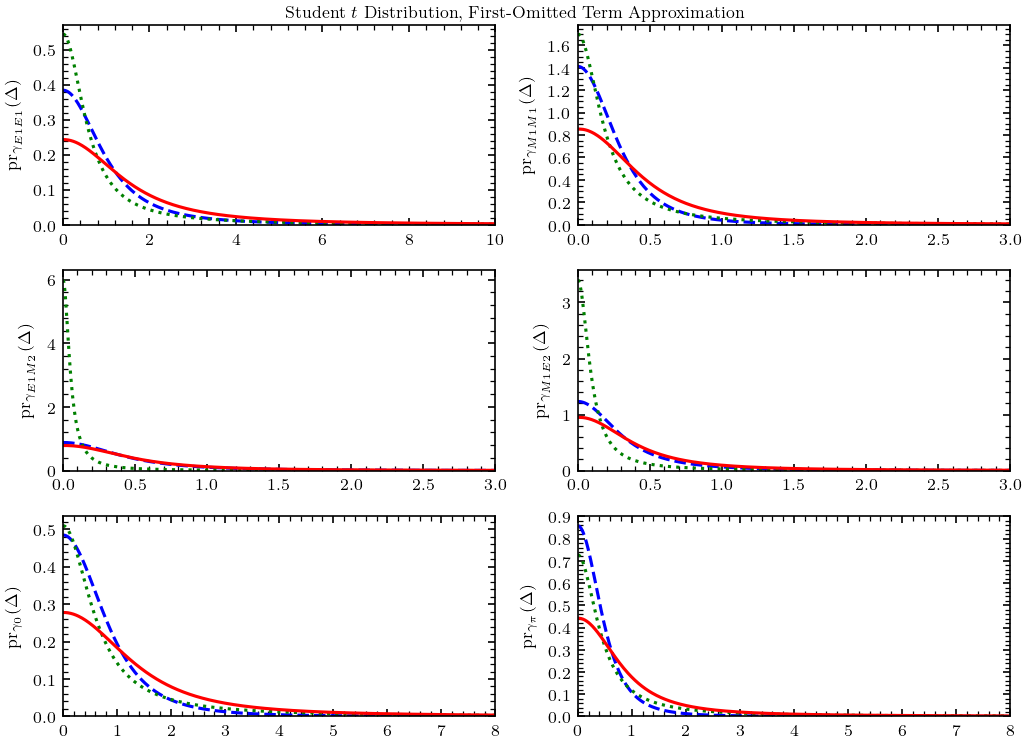

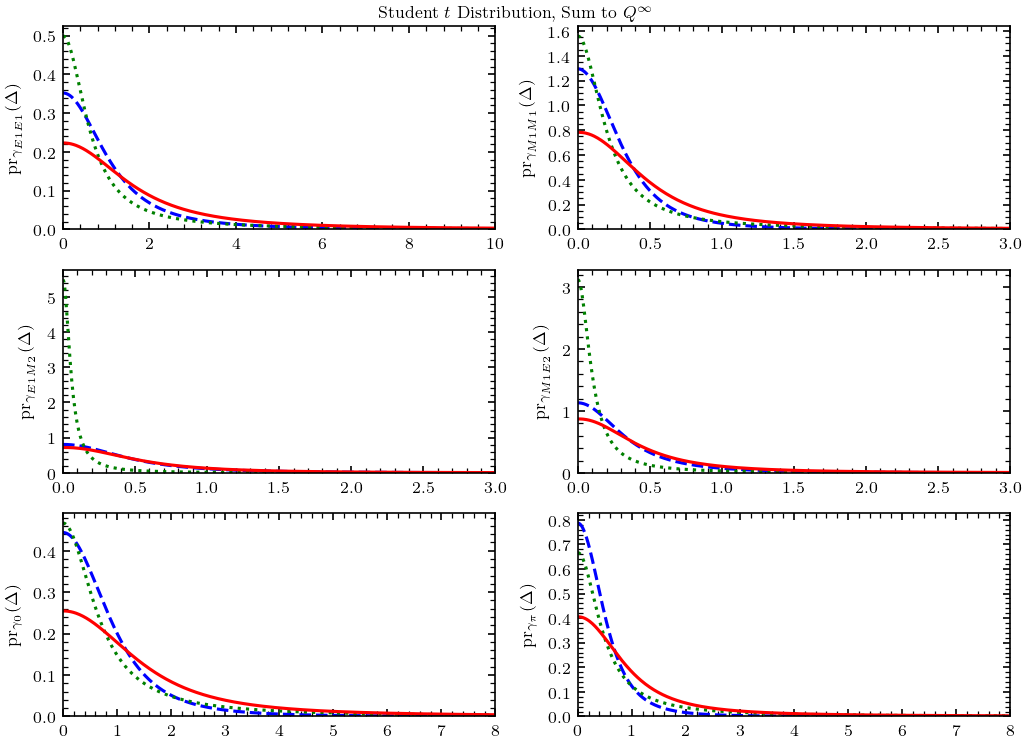

In [26]:
for sum_to_inf in [False, True]:
    fig, axes = plt.subplots(3, 2, figsize=(7, 5))

    ax_e1e1 = plot_scalar_and_vector_student(
        d_e1e1, coefs_e1e1_scalar, coefs_e1e1_vector, delta, 
        first_omitted_order_s=first_omitted_s, first_omitted_order_v=first_omitted_v,
        nu0=nu_0, tau0=tau_0, ax=axes[0, 0], full_sum=sum_to_inf
    )
    ax_e1e1.yaxis.set_major_locator(MultipleLocator(0.1))
    ax_e1e1.set_ylabel(r'pr$_{\gamma_{E1E1}}(\Delta)$')


    ax_m1m1 = plot_scalar_and_vector_student(
        d_m1m1, coefs_m1m1_scalar, coefs_m1m1_vector, delta,
        first_omitted_order_s=first_omitted_s, first_omitted_order_v=first_omitted_v,
        num_y_minor=4, nu0=nu_0, tau0=tau_0, ax=axes[0, 1], full_sum=sum_to_inf
    )
    ax_m1m1.yaxis.set_major_locator(MultipleLocator(0.2))
    ax_m1m1.set_ylabel(r'pr$_{\gamma_{M1M1}}(\Delta)$')

    ax_e1m2 = plot_scalar_and_vector_student(
        d_e1m2, coefs_e1m2_scalar, coefs_e1m2_vector, delta,
        first_omitted_order_s=first_omitted_s, first_omitted_order_v=first_omitted_v,
        nu0=nu_0, tau0=tau_0, ax=axes[1, 0], full_sum=sum_to_inf
    )
    ax_e1m2.set_ylabel(r'pr$_{\gamma_{E1M2}}(\Delta)$')

    ax_m1e2 = plot_scalar_and_vector_student(
        d_m1e2, coefs_m1e2_scalar, coefs_m1e2_vector, delta,
        first_omitted_order_s=first_omitted_s, first_omitted_order_v=first_omitted_v,
        nu0=nu_0, tau0=tau_0, ax=axes[1, 1], full_sum=sum_to_inf
    )
    ax_m1e2.set_ylabel(r'pr$_{\gamma_{M1E2}}(\Delta)$')
    
    ax_0 = plot_scalar_and_vector_student(
        d_0, coefs_0_scalar, coefs_0_vector, delta,
        first_omitted_order_s=first_omitted_s, first_omitted_order_v=first_omitted_v,
        nu0=nu_0, tau0=tau_0, ax=axes[2, 0], full_sum=sum_to_inf
    )
    ax_0.yaxis.set_major_locator(MultipleLocator(0.1))
    ax_0.set_ylabel(r'pr$_{\gamma_0}(\Delta)$')

    ax_pi = plot_scalar_and_vector_student(
        d_pi, coefs_pi_scalar, coefs_pi_vector, delta,
        first_omitted_order_s=first_omitted_s, first_omitted_order_v=first_omitted_v,
        nu0=nu_0, tau0=tau_0, ax=axes[2, 1], full_sum=sum_to_inf
    )
    ax_pi.yaxis.set_major_locator(MultipleLocator(0.1))
    ax_pi.set_ylabel(r'pr$_{\gamma_{\pi}}(\Delta)$')

    if sum_to_inf:
        fig.suptitle('Student $t$ Distribution, Sum to $Q^\infty$', y=1)
    else:
        fig.suptitle('Student $t$ Distribution, First-Omitted Term Approximation', y=1)
    fig.tight_layout()
    plt.show()
    fig.savefig(f'pol_priors_conjugate_student_sum-inf-{sum_to_inf}')